In [7]:
# importing libraries

In [8]:
import pandas as pd

In [9]:
# read csv file

In [10]:
df=pd.read_csv('PowerPlant.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [12]:
df.head(7)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35


In [13]:
df.shape

(9568, 5)

In [14]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [15]:
# seperate inp and op

In [16]:
x=df.drop(labels='PE',axis=1)
y=df[['PE']]

In [17]:
x

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20
...,...,...,...,...
9563,15.12,48.92,1011.80,72.93
9564,33.41,77.95,1010.30,59.72
9565,15.99,43.34,1014.20,78.66
9566,17.65,59.87,1018.58,94.65


In [18]:
y

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43
...,...
9563,462.59
9564,432.90
9565,465.96
9566,450.93


In [19]:
# preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss=StandardScaler()

In [22]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [23]:
x

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427
...,...,...,...,...
9563,-0.608049,-0.423838,-0.245699,-0.025958
9564,1.846298,1.860689,-0.498289,-0.930783
9565,-0.491303,-0.862958,0.158445,0.366521
9566,-0.268547,0.437876,0.896008,1.461763


In [24]:
# train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [27]:
xtrain.shape

(7654, 4)

In [28]:
xtest.shape

(1914, 4)

In [29]:
# Build the neural network

In [30]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [31]:
from threading import active_count
# initialize the model
model=Sequential()

# Add input layers
model.add(Input(shape=(xtrain.shape[1],)))

# Add hidden layer 1
model.add(Dense(units=64,activation='relu'))
# Add hidden layer 2
model.add(Dense(units=32,activation='relu'))

# Add Output layer
model.add(Dense(units=1,activation='linear'))

In [32]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [33]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 201867.8906 - mae: 448.7583 - val_loss: 139379.5156 - val_mae: 370.5189
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96428.2969 - mae: 294.9827 - val_loss: 20530.2656 - val_mae: 121.6747
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16684.9062 - mae: 109.8494 - val_loss: 9750.1201 - val_mae: 82.8055
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7872.5796 - mae: 74.5271 - val_loss: 4175.9199 - val_mae: 53.6255
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3451.1687 - mae: 48.5086 - val_loss: 1847.9271 - val_mae: 34.6485
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1583.9642 - mae: 31.6105 - val_loss: 977.2963 - val_mae: 24.4420
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 843.2379 - mae: 22.4356 - val_loss: 588.1516 - val_mae: 18.5154
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 534.0715 - mae: 17.5464 - val_loss: 378.7345 - va

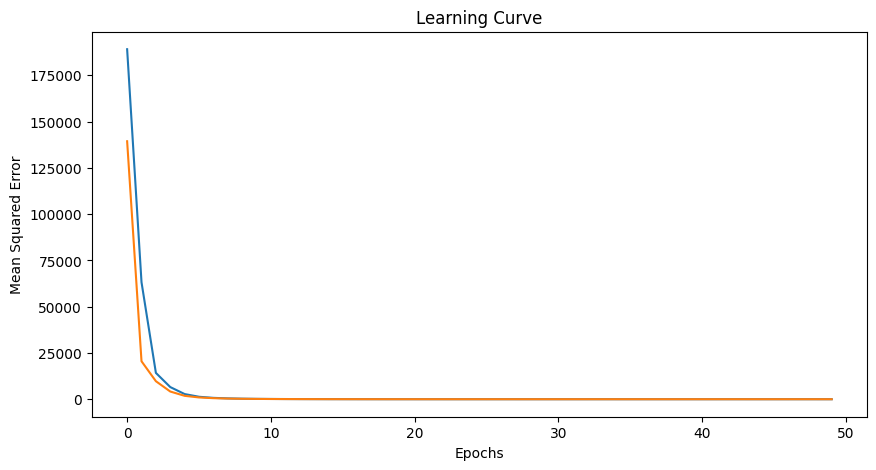

In [34]:
# plot the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

In [35]:
# evaluate model

In [36]:
model.evaluate(xtrain,ytrain)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5826 - mae: 3.4945


[19.733001708984375, 3.4707467555999756]

In [37]:
model.evaluate(xtest,ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3634 - mae: 3.4023


[19.979618072509766, 3.5268468856811523]

In [38]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
from sklearn.metrics import r2_score

In [40]:
tr_scr=r2_score(tr_pred,ytrain)
ts_scr=r2_score(ts_pred,ytest)
print(tr_scr)
print(ts_scr)

0.923081636428833
0.9231938123703003
